# Ejemplos de Modelos Supervisados


## Ejemplo de kNN con scikit-learn


- Con scikit-learn es posible cargar set de datos, para una revisión detallada de cuales sets favor revisar: http://scikit-learn.org/stable/datasets/index.html#toy-datasets

- Procedemos a cargar las librerias correspondientes, train_test_split ya lo conocemos de la práctica anterior. La novedad acá es KNeighborsClassifier que corresponde al clasificador kNN y el llamado del dataset load_breast_cancer:

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

Se carga ahora el set de datos **load_breast_cancer**, un caso típico de clasificación binaria:

In [2]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)

Verificamos el valor de las clases:

In [34]:
list(cancer.target_names)

['malignant', 'benign']

Inicializamos las listas:

In [3]:
training_accuracy = []
test_accuracy = []

Creamos la curva de "*training/test acurracy vrs. k*", para más detalle del parámetro **score** refererirse a la documentación en: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html 

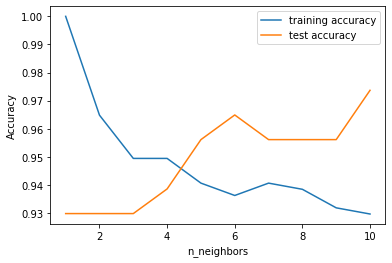

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # se construye el modelo de clasificacion
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(clf.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

## Ejemplo Logistic Regression

Procedemos como en el casos anteriores, para más detalles sobre Logistic Regression referirse a: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer

In [9]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.33, random_state=6)
logreg = LogisticRegression(solver='liblinear').fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.948
Test set score: 0.968


Probamos hacer una curva de training/test score para varios valores de **C**?

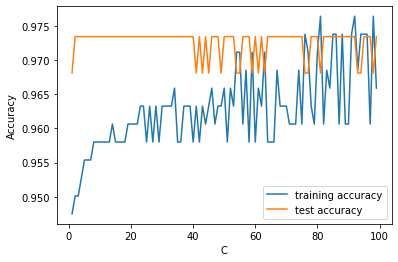

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

training_acc = []
test_acc = []

rango = range(1, 100)
for c in rango:
    # se construye el modelo de clasificacion
    clf = LogisticRegression(C=c, solver='liblinear')
    clf.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_acc.append(clf.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_acc.append(clf.score(X_test, y_test))
plt.plot(rango, training_acc, label="training accuracy")
plt.plot(rango, test_acc, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend()

## Ejemplo de naive Bayes con scikit-learn

Procedemos a cargar las librerias correspondientes, **train_test_split** ya lo conocemos de la práctica anterior. La novedad acá es **GaussianNB** que corresponde al clasificador NB Gaussiano y el llamado del dataset **load_breast_cancer**:

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

Se carga ahora el set de datos **load_breast_cancer**:

In [12]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)

Entrenamos al sistema con el algoritmo Gaussian NBm, recuerde siempre validar el uso del clasificador en: http://scikit-learn.org/stable/modules/naive_bayes.html


In [13]:
nbg = GaussianNB().fit(X_train, y_train)
print("Training set score: {:.3f}".format(nbg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(nbg.score(X_test, y_test)))

Training set score: 0.936
Test set score: 0.974


## Ejemplo Decision Trees 

Procedemos como en el casos anteriores, para más detalles sobre *LDecision Trees* referirse a: http://scikit-learn.org/stable/modules/tree.html

Se llama a la libreria **DecisionTreeClassifier**, se llama la a **DecisionTreeClassifier**, se carga el dataset **load_breast_cancer** (ya se hizo previamente pero lo volvemos a ejecutar acá:

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

Se cargan los datos y se dividen:

In [15]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

Se ejecuta el clasificador:

In [16]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Se imprimen los resultados:

In [17]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.930


Como se observa, se trata de un arbol puro ya que se ajusta 100% con el training set, es decir, esta memorizando la información suministrada como entrenamiento y por lo tanto no generaliza adecuadamente (overfit). Procedemos a limitar la profundidad del árbol a sólo 4 pruebas (preguntas):

In [18]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.995
Accuracy on test set: 0.951


ahora con *min_samples_split=15* ...

In [19]:
tree = DecisionTreeClassifier(min_samples_split=15, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.965
Accuracy on test set: 0.923


Se puede determinar el nivel de importancia de cada atributo con **"tree feature importances"**:

In [20]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.02898825 0.         0.         0.         0.
 0.         0.77559439 0.         0.         0.01423381 0.
 0.         0.         0.00173252 0.         0.         0.
 0.         0.         0.06574509 0.06424941 0.         0.03847168
 0.01098484 0.         0.         0.         0.         0.        ]


De igual forma se puede visualizar usando la siguiente rutina:

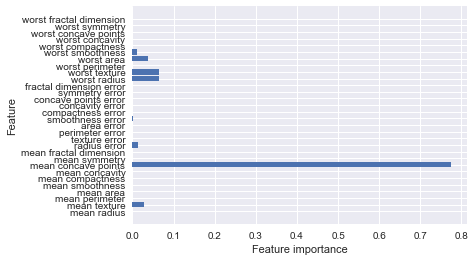

In [21]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importances_cancer(tree)

## Ejemplo Random Forest

Procedemos como en el casos anteriores, para más detalles sobre *Random Forest* referirse a: http://scikit-learn.org/stable/modules/ensemble.html#forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [23]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.33)
rf = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)
print("Training set score: {:.3f}".format(rf.score(X_train, y_train)))
print("Test set score: {:.3f}".format(rf.score(X_test, y_test)))

Training set score: 0.997
Test set score: 0.979


ahora con más estimators...

In [24]:
rf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(rf.score(X_train, y_train)))
print("Test set score: {:.3f}".format(rf.score(X_test, y_test)))

Training set score: 1.000
Test set score: 0.947


## Ejemplo kSVM

Procedemos como en el casos anteriores, para más detalles sobre *kSVM* referirse a: http://scikit-learn.org/stable/modules/svm.html#kernel-functions, esta vez iniciamos con el clasificador:

In [25]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.63


Dados los resultados procedemos a validar visualmente los valores maximos y minimos para este conjunto de datos:

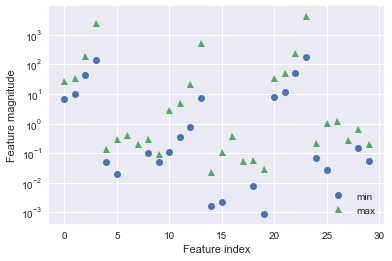

In [26]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

Se procede a hacer un cambio en la escala de los datos, una escala muy adecuada para estos escenarios es la conversión a [0 ... 1]:

In [27]:
# compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)

# compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, and divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training

print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [28]:
# use THE SAME transformation on the test set,
# using min and range of the training set

X_test_scaled = (X_test - min_on_training) / range_on_training

Text(0, 0.5, 'Feature magnitude')

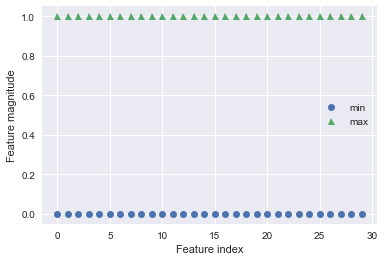

In [29]:
plt.figure()
plt.plot(X_train_scaled.min(axis=0), 'o', label="min")
plt.plot(X_train_scaled.max(axis=0), '^', label="max")
plt.legend(loc=5)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

Ahora se evalua el clasificador con los conjutos de datos escalados:

In [30]:
svc = SVC(gamma='auto')
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.948
Accuracy on test set: 0.951


Se puede mejorar? Que tal si lo intentamos encontrando un valor apto para **C**:

In [31]:
svc = SVC(C=100, gamma='auto')
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.986
Accuracy on test set: 0.965


y con **gamma**?

In [32]:
svc = SVC(C=100, gamma=0.1)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.986
Accuracy on test set: 0.972


Se observa como el modificar o ajustar los valores de **C** y **gamma** mejoran ligeramente el modelo.

## VERIFICACIÓN

https://scikit-learn.org/stable/modules/cross_validation.html